In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

# Validation & Test data
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    "dataset/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_data = val_test_datagen.flow_from_directory(
    "dataset/val",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_data = val_test_datagen.flow_from_directory(
    "dataset/test",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

NUM_CLASSES = train_data.num_classes
print("Classes:", train_data.class_indices)


Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.
Classes: {'animal fish': 0, 'animal fish bass': 1, 'fish sea_food black_sea_sprat': 2, 'fish sea_food gilt_head_bream': 3, 'fish sea_food hourse_mackerel': 4, 'fish sea_food red_mullet': 5, 'fish sea_food red_sea_bream': 6, 'fish sea_food sea_bass': 7, 'fish sea_food shrimp': 8, 'fish sea_food striped_red_mullet': 9, 'fish sea_food trout': 10}


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

checkpoint = ModelCheckpoint(
    "models/cnn_from_scratch_best.h5",
    monitor="val_accuracy",
    save_best_only=True,
    verbose=1
)

history_cnn = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=[checkpoint]
)


c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 934ms/step - accuracy: 0.3765 - loss: 1.9204
Epoch 1: val_accuracy improved from None to 0.70421, saving model to models/cnn_from_scratch_best.h5



Epoch 1: finished saving model to models/cnn_from_scratch_best.h5
195/195 ━━━━━━━━━━━━━━━━━━━━ 189s 960ms/step - accuracy: 0.5060 - loss: 1.4378 - val_accuracy: 0.7042 - val_loss: 0.8763
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 690ms/step - accuracy: 0.7197 - loss: 0.8079
Epoch 2: val_accuracy improved from 0.70421 to 0.77930, saving model to models/cnn_from_scratch_best.h5



Epoch 2: finished saving model to models/cnn_from_scratch_best.h5
195/195 ━━━━━━━━━━━━━━━━━━━━ 140s 715ms/step - accuracy: 0.7478 - loss: 0.7167 - val_accuracy: 0.7793 - val_loss: 0.6162
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 675ms/step - accuracy: 0.8377 - loss: 0.4742
Epoch 3: val_accuracy improved from 0.77930 to 0.88736, saving model to models/cnn_from_scratch_best.h5



Epoch 3: finished saving model to models/cnn_from_scratch_best.h5
195/195 ━━━━━━━━━━━━━━━━━━━━ 137s 700ms/step - accuracy: 0.8467 - loss: 0.4404 - val_accuracy: 0.8874 - val_loss: 0.3352
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 674ms/step - accuracy: 0.8957 - loss: 0.3013
Epoch 4: val_accuracy did not improve from 0.88736
195/195 ━━━━━━━━━━━━━━━━━━━━ 136s 696ms/step - accuracy: 0.8982 - loss: 0.3044 - val_accuracy: 0.8059 - val_loss: 0.6417
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 711ms/step - accuracy: 0.8905 - loss: 0.3096
Epoch 5: val_accuracy improved from 0.88736 to 0.92582, saving model to models/cnn_from_scratch_best.h5



Epoch 5: finished saving model to models/cnn_from_scratch_best.h5
195/195 ━━━━━━━━━━━━━━━━━━━━ 144s 737ms/step - accuracy: 0.9108 - loss: 0.2541 - val_accuracy: 0.9258 - val_loss: 0.2526
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 754ms/step - accuracy: 0.9349 - loss: 0.1875
Epoch 6: val_accuracy improved from 0.92582 to 0.93223, saving model to models/cnn_from_scratch_best.h5



Epoch 6: finished saving model to models/cnn_from_scratch_best.h5
195/195 ━━━━━━━━━━━━━━━━━━━━ 152s 781ms/step - accuracy: 0.9449 - loss: 0.1672 - val_accuracy: 0.9322 - val_loss: 0.2586
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 755ms/step - accuracy: 0.9386 - loss: 0.1841
Epoch 7: val_accuracy improved from 0.93223 to 0.97161, saving model to models/cnn_from_scratch_best.h5



Epoch 7: finished saving model to models/cnn_from_scratch_best.h5
195/195 ━━━━━━━━━━━━━━━━━━━━ 153s 781ms/step - accuracy: 0.9380 - loss: 0.1878 - val_accuracy: 0.9716 - val_loss: 0.1367
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 800ms/step - accuracy: 0.9717 - loss: 0.0945
Epoch 8: val_accuracy improved from 0.97161 to 0.97711, saving model to models/cnn_from_scratch_best.h5



Epoch 8: finished saving model to models/cnn_from_scratch_best.h5
195/195 ━━━━━━━━━━━━━━━━━━━━ 161s 826ms/step - accuracy: 0.9606 - loss: 0.1229 - val_accuracy: 0.9771 - val_loss: 0.1175
Epoch 9/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 704ms/step - accuracy: 0.9731 - loss: 0.0882
Epoch 9: val_accuracy did not improve from 0.97711
195/195 ━━━━━━━━━━━━━━━━━━━━ 142s 729ms/step - accuracy: 0.9631 - loss: 0.1154 - val_accuracy: 0.9679 - val_loss: 0.1652
Epoch 10/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 695ms/step - accuracy: 0.9596 - loss: 0.1055
Epoch 10: val_accuracy did not improve from 0.97711
195/195 ━━━━━━━━━━━━━━━━━━━━ 140s 717ms/step - accuracy: 0.9614 - loss: 0.1071 - val_accuracy: 0.9679 - val_loss: 0.1512


In [5]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [ ]:
def train_pretrained_model(base_model_fn, model_name):
    base_model = base_model_fn(
        weights="imagenet",
        include_top=False,
        input_shape=(224,224,3)
    )

    
    for layer in base_model.layers[:-20]:
        layer.trainable = False
    for layer in base_model.layers[-20:]:
        layer.trainable = True

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation="relu")(x)
    output = Dense(NUM_CLASSES, activation="softmax")(x)

    model = Model(inputs=base_model.input, outputs=output)

    model.compile(
        optimizer=Adam(learning_rate=1e-4),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    checkpoint = ModelCheckpoint(
        f"models/{model_name}_best.h5",
        monitor="val_accuracy",
        save_best_only=True,
        verbose=1
    )

    history = model.fit(
        train_data,
        validation_data=val_data,
        epochs=8,
        callbacks=[checkpoint]
    )

    return history


In [7]:
from tensorflow.keras.applications import VGG16
history_vgg16 = train_pretrained_model(VGG16, "VGG16")

Epoch 1/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.4469 - loss: 1.5316 
Epoch 1: val_accuracy improved from None to 0.92582, saving model to models/VGG16_best.h5



Epoch 1: finished saving model to models/VGG16_best.h5
195/195 ━━━━━━━━━━━━━━━━━━━━ 2826s 14s/step - accuracy: 0.6635 - loss: 0.9346 - val_accuracy: 0.9258 - val_loss: 0.2269
Epoch 2/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.9373 - loss: 0.1865 
Epoch 2: val_accuracy improved from 0.92582 to 0.97894, saving model to models/VGG16_best.h5



Epoch 2: finished saving model to models/VGG16_best.h5
195/195 ━━━━━━━━━━━━━━━━━━━━ 2831s 15s/step - accuracy: 0.9480 - loss: 0.1617 - val_accuracy: 0.9789 - val_loss: 0.0772
Epoch 3/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.9748 - loss: 0.0765 
Epoch 3: val_accuracy improved from 0.97894 to 0.98260, saving model to models/VGG16_best.h5



Epoch 3: finished saving model to models/VGG16_best.h5
195/195 ━━━━━━━━━━━━━━━━━━━━ 2754s 14s/step - accuracy: 0.9738 - loss: 0.0811 - val_accuracy: 0.9826 - val_loss: 0.0599
Epoch 4/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.9823 - loss: 0.0541 
Epoch 4: val_accuracy improved from 0.98260 to 0.98535, saving model to models/VGG16_best.h5



Epoch 4: finished saving model to models/VGG16_best.h5
195/195 ━━━━━━━━━━━━━━━━━━━━ 2862s 15s/step - accuracy: 0.9804 - loss: 0.0581 - val_accuracy: 0.9853 - val_loss: 0.0455
Epoch 5/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.9795 - loss: 0.0675 
Epoch 5: val_accuracy improved from 0.98535 to 0.98993, saving model to models/VGG16_best.h5



Epoch 5: finished saving model to models/VGG16_best.h5
195/195 ━━━━━━━━━━━━━━━━━━━━ 2897s 15s/step - accuracy: 0.9785 - loss: 0.0723 - val_accuracy: 0.9899 - val_loss: 0.0341
Epoch 6/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.9920 - loss: 0.0294 
Epoch 6: val_accuracy did not improve from 0.98993
195/195 ━━━━━━━━━━━━━━━━━━━━ 2751s 14s/step - accuracy: 0.9900 - loss: 0.0329 - val_accuracy: 0.9679 - val_loss: 0.1059
Epoch 7/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.9793 - loss: 0.0605 
Epoch 7: val_accuracy did not improve from 0.98993
195/195 ━━━━━━━━━━━━━━━━━━━━ 2718s 14s/step - accuracy: 0.9775 - loss: 0.0730 - val_accuracy: 0.9863 - val_loss: 0.0371
Epoch 8/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.9887 - loss: 0.0435 
Epoch 8: val_accuracy did not improve from 0.98993
195/195 ━━━━━━━━━━━━━━━━━━━━ 2860s 15s/step - accuracy: 0.9902 - loss: 0.0356 - val_accuracy: 0.9863 - val_loss: 0.0280


In [8]:
from tensorflow.keras.applications import ResNet50
history_resnet50 = train_pretrained_model(ResNet50, "ResNet50")

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 34s 0us/step
Epoch 1/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3834 - loss: 1.7650
Epoch 1: val_accuracy improved from None to 0.20788, saving model to models/ResNet50_best.h5



Epoch 1: finished saving model to models/ResNet50_best.h5
195/195 ━━━━━━━━━━━━━━━━━━━━ 371s 2s/step - accuracy: 0.4876 - loss: 1.4762 - val_accuracy: 0.2079 - val_loss: 2.3780
Epoch 2/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6397 - loss: 1.0304
Epoch 2: val_accuracy improved from 0.20788 to 0.31868, saving model to models/ResNet50_best.h5



Epoch 2: finished saving model to models/ResNet50_best.h5
195/195 ━━━━━━━━━━━━━━━━━━━━ 340s 2s/step - accuracy: 0.6479 - loss: 1.0078 - val_accuracy: 0.3187 - val_loss: 4.8674
Epoch 3/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6909 - loss: 0.8890
Epoch 3: val_accuracy improved from 0.31868 to 0.59615, saving model to models/ResNet50_best.h5



Epoch 3: finished saving model to models/ResNet50_best.h5
195/195 ━━━━━━━━━━━━━━━━━━━━ 345s 2s/step - accuracy: 0.7020 - loss: 0.8560 - val_accuracy: 0.5962 - val_loss: 1.2438
Epoch 4/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7243 - loss: 0.8006
Epoch 4: val_accuracy improved from 0.59615 to 0.63187, saving model to models/ResNet50_best.h5



Epoch 4: finished saving model to models/ResNet50_best.h5
195/195 ━━━━━━━━━━━━━━━━━━━━ 342s 2s/step - accuracy: 0.7369 - loss: 0.7702 - val_accuracy: 0.6319 - val_loss: 1.2163
Epoch 5/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7565 - loss: 0.7093
Epoch 5: val_accuracy improved from 0.63187 to 0.64652, saving model to models/ResNet50_best.h5



Epoch 5: finished saving model to models/ResNet50_best.h5
195/195 ━━━━━━━━━━━━━━━━━━━━ 345s 2s/step - accuracy: 0.7685 - loss: 0.6732 - val_accuracy: 0.6465 - val_loss: 1.0396
Epoch 6/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7667 - loss: 0.6509
Epoch 6: val_accuracy improved from 0.64652 to 0.72894, saving model to models/ResNet50_best.h5



Epoch 6: finished saving model to models/ResNet50_best.h5
195/195 ━━━━━━━━━━━━━━━━━━━━ 340s 2s/step - accuracy: 0.7695 - loss: 0.6420 - val_accuracy: 0.7289 - val_loss: 0.7487
Epoch 7/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7949 - loss: 0.5863
Epoch 7: val_accuracy did not improve from 0.72894
195/195 ━━━━━━━━━━━━━━━━━━━━ 338s 2s/step - accuracy: 0.7920 - loss: 0.5917 - val_accuracy: 0.4954 - val_loss: 2.3968
Epoch 8/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8148 - loss: 0.5557
Epoch 8: val_accuracy did not improve from 0.72894
195/195 ━━━━━━━━━━━━━━━━━━━━ 340s 2s/step - accuracy: 0.8156 - loss: 0.5412 - val_accuracy: 0.4670 - val_loss: 1.9427


In [9]:
from tensorflow.keras.applications import MobileNetV2
history_mobilenet = train_pretrained_model(MobileNetV2, "MobileNetV2")

Epoch 1/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 614ms/step - accuracy: 0.7608 - loss: 0.8248
Epoch 1: val_accuracy improved from None to 0.85440, saving model to models/MobileNetV2_best.h5



Epoch 1: finished saving model to models/MobileNetV2_best.h5
195/195 ━━━━━━━━━━━━━━━━━━━━ 140s 685ms/step - accuracy: 0.9063 - loss: 0.3546 - val_accuracy: 0.8544 - val_loss: 0.4737
Epoch 2/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 619ms/step - accuracy: 0.9905 - loss: 0.0440
Epoch 2: val_accuracy improved from 0.85440 to 0.93315, saving model to models/MobileNetV2_best.h5



Epoch 2: finished saving model to models/MobileNetV2_best.h5
195/195 ━━━━━━━━━━━━━━━━━━━━ 133s 684ms/step - accuracy: 0.9915 - loss: 0.0386 - val_accuracy: 0.9332 - val_loss: 0.2076
Epoch 3/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 618ms/step - accuracy: 0.9964 - loss: 0.0175
Epoch 3: val_accuracy improved from 0.93315 to 0.95604, saving model to models/MobileNetV2_best.h5



Epoch 3: finished saving model to models/MobileNetV2_best.h5
195/195 ━━━━━━━━━━━━━━━━━━━━ 133s 681ms/step - accuracy: 0.9961 - loss: 0.0178 - val_accuracy: 0.9560 - val_loss: 0.1291
Epoch 4/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 611ms/step - accuracy: 0.9988 - loss: 0.0105
Epoch 4: val_accuracy improved from 0.95604 to 0.97985, saving model to models/MobileNetV2_best.h5



Epoch 4: finished saving model to models/MobileNetV2_best.h5
195/195 ━━━━━━━━━━━━━━━━━━━━ 132s 676ms/step - accuracy: 0.9986 - loss: 0.0095 - val_accuracy: 0.9799 - val_loss: 0.0641
Epoch 5/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 612ms/step - accuracy: 0.9984 - loss: 0.0076
Epoch 5: val_accuracy improved from 0.97985 to 0.98718, saving model to models/MobileNetV2_best.h5



Epoch 5: finished saving model to models/MobileNetV2_best.h5
195/195 ━━━━━━━━━━━━━━━━━━━━ 132s 677ms/step - accuracy: 0.9981 - loss: 0.0082 - val_accuracy: 0.9872 - val_loss: 0.0491
Epoch 6/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 618ms/step - accuracy: 0.9975 - loss: 0.0074
Epoch 6: val_accuracy did not improve from 0.98718
195/195 ━━━━━━━━━━━━━━━━━━━━ 133s 681ms/step - accuracy: 0.9981 - loss: 0.0072 - val_accuracy: 0.9771 - val_loss: 0.0808
Epoch 7/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 622ms/step - accuracy: 0.9969 - loss: 0.0124
Epoch 7: val_accuracy improved from 0.98718 to 0.99084, saving model to models/MobileNetV2_best.h5



Epoch 7: finished saving model to models/MobileNetV2_best.h5
195/195 ━━━━━━━━━━━━━━━━━━━━ 134s 686ms/step - accuracy: 0.9965 - loss: 0.0116 - val_accuracy: 0.9908 - val_loss: 0.0243
Epoch 8/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 611ms/step - accuracy: 0.9959 - loss: 0.0110
Epoch 8: val_accuracy did not improve from 0.99084
195/195 ━━━━━━━━━━━━━━━━━━━━ 131s 674ms/step - accuracy: 0.9963 - loss: 0.0117 - val_accuracy: 0.9872 - val_loss: 0.0340


In [10]:
from tensorflow.keras.applications import InceptionV3
history_inception = train_pretrained_model(InceptionV3, "InceptionV3")

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 30s 0us/step
Epoch 1/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 810ms/step - accuracy: 0.7553 - loss: 0.9181
Epoch 1: val_accuracy improved from None to 0.96978, saving model to models/InceptionV3_best.h5



Epoch 1: finished saving model to models/InceptionV3_best.h5
195/195 ━━━━━━━━━━━━━━━━━━━━ 192s 944ms/step - accuracy: 0.8904 - loss: 0.4655 - val_accuracy: 0.9698 - val_loss: 0.1234
Epoch 2/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 843ms/step - accuracy: 0.9747 - loss: 0.1140
Epoch 2: val_accuracy improved from 0.96978 to 0.98901, saving model to models/InceptionV3_best.h5



Epoch 2: finished saving model to models/InceptionV3_best.h5
195/195 ━━━━━━━━━━━━━━━━━━━━ 189s 968ms/step - accuracy: 0.9785 - loss: 0.0975 - val_accuracy: 0.9890 - val_loss: 0.0549
Epoch 3/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 847ms/step - accuracy: 0.9859 - loss: 0.0624
Epoch 3: val_accuracy did not improve from 0.98901
195/195 ━━━━━━━━━━━━━━━━━━━━ 190s 975ms/step - accuracy: 0.9891 - loss: 0.0542 - val_accuracy: 0.9863 - val_loss: 0.0425
Epoch 4/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 842ms/step - accuracy: 0.9905 - loss: 0.0415
Epoch 4: val_accuracy improved from 0.98901 to 0.99359, saving model to models/InceptionV3_best.h5



Epoch 4: finished saving model to models/InceptionV3_best.h5
195/195 ━━━━━━━━━━━━━━━━━━━━ 188s 964ms/step - accuracy: 0.9902 - loss: 0.0404 - val_accuracy: 0.9936 - val_loss: 0.0265
Epoch 5/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 832ms/step - accuracy: 0.9950 - loss: 0.0264
Epoch 5: val_accuracy did not improve from 0.99359
195/195 ━━━━━━━━━━━━━━━━━━━━ 186s 953ms/step - accuracy: 0.9947 - loss: 0.0267 - val_accuracy: 0.9908 - val_loss: 0.0315
Epoch 6/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 846ms/step - accuracy: 0.9979 - loss: 0.0201
Epoch 6: val_accuracy improved from 0.99359 to 0.99451, saving model to models/InceptionV3_best.h5



Epoch 6: finished saving model to models/InceptionV3_best.h5
195/195 ━━━━━━━━━━━━━━━━━━━━ 189s 970ms/step - accuracy: 0.9953 - loss: 0.0216 - val_accuracy: 0.9945 - val_loss: 0.0208
Epoch 7/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 836ms/step - accuracy: 0.9951 - loss: 0.0210
Epoch 7: val_accuracy did not improve from 0.99451
195/195 ━━━━━━━━━━━━━━━━━━━━ 186s 956ms/step - accuracy: 0.9965 - loss: 0.0169 - val_accuracy: 0.9927 - val_loss: 0.0239
Epoch 8/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 860ms/step - accuracy: 0.9948 - loss: 0.0172
Epoch 8: val_accuracy did not improve from 0.99451
195/195 ━━━━━━━━━━━━━━━━━━━━ 192s 985ms/step - accuracy: 0.9944 - loss: 0.0183 - val_accuracy: 0.9945 - val_loss: 0.0189


In [11]:
from tensorflow.keras.applications import EfficientNetB0
history_efficientnet = train_pretrained_model(EfficientNetB0, "EfficientNetB0")

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
Epoch 1/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 712ms/step - accuracy: 0.1447 - loss: 2.3453
Epoch 1: val_accuracy improved from None to 0.17125, saving model to models/EfficientNetB0_best.h5



Epoch 1: finished saving model to models/EfficientNetB0_best.h5
195/195 ━━━━━━━━━━━━━━━━━━━━ 168s 808ms/step - accuracy: 0.1655 - loss: 2.3219 - val_accuracy: 0.1712 - val_loss: 2.3299
Epoch 2/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 717ms/step - accuracy: 0.1678 - loss: 2.3111
Epoch 2: val_accuracy did not improve from 0.17125
195/195 ━━━━━━━━━━━━━━━━━━━━ 156s 801ms/step - accuracy: 0.1738 - loss: 2.3063 - val_accuracy: 0.1712 - val_loss: 2.3062
Epoch 3/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 719ms/step - accuracy: 0.1777 - loss: 2.3061
Epoch 3: val_accuracy did not improve from 0.17125
195/195 ━━━━━━━━━━━━━━━━━━━━ 157s 802ms/step - accuracy: 0.1765 - loss: 2.3016 - val_accuracy: 0.1712 - val_loss: 2.3012
Epoch 4/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 712ms/step - accuracy: 0.1745 - loss: 2.2978
Epoch 4: val_accuracy did not improve from 0.17125
195/195 ━━━━━━━━━━━━━━━━━━━━ 155s 796ms/step - accuracy: 0.1761 - loss: 2.2947 - val_accuracy: 0.1712 - val_loss: 2.2892
Epoch 5/8
195/195 ━━━━━━━━━━━━━━━━━━━


Epoch 6: finished saving model to models/EfficientNetB0_best.h5
195/195 ━━━━━━━━━━━━━━━━━━━━ 154s 790ms/step - accuracy: 0.1910 - loss: 2.2510 - val_accuracy: 0.1896 - val_loss: 2.2358
Epoch 7/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 701ms/step - accuracy: 0.1992 - loss: 2.1983
Epoch 7: val_accuracy did not improve from 0.18956
195/195 ━━━━━━━━━━━━━━━━━━━━ 153s 783ms/step - accuracy: 0.2011 - loss: 2.2014 - val_accuracy: 0.1190 - val_loss: 2.5130
Epoch 8/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 771ms/step - accuracy: 0.2077 - loss: 2.1781
Epoch 8: val_accuracy improved from 0.18956 to 0.25641, saving model to models/EfficientNetB0_best.h5



Epoch 8: finished saving model to models/EfficientNetB0_best.h5
195/195 ━━━━━━━━━━━━━━━━━━━━ 167s 859ms/step - accuracy: 0.2149 - loss: 2.1729 - val_accuracy: 0.2564 - val_loss: 2.1694


In [12]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [13]:
model_paths = {
    "CNN_Scratch": "models/cnn_from_scratch_best.h5",
    "VGG16": "models/VGG16_best.h5",
    "ResNet50": "models/ResNet50_best.h5",
    "MobileNetV2": "models/MobileNetV2_best.h5",
    "InceptionV3": "models/InceptionV3_best.h5",
    "EfficientNetB0": "models/EfficientNetB0_best.h5"
}

models = {name: load_model(path) for name, path in model_paths.items()}


In [14]:
def evaluate_model(model, model_name):
    test_data.reset()

    predictions = model.predict(test_data)
    y_pred = np.argmax(predictions, axis=1)
    y_true = test_data.classes

    print(f"\n===== {model_name} =====")
    print(classification_report(y_true, y_pred, target_names=list(test_data.class_indices.keys())))

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(5,4))
    plt.imshow(cm)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.colorbar()
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    accuracy = np.mean(y_pred == y_true)
    return accuracy


100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 386ms/step

===== CNN_Scratch =====
                                  precision    recall  f1-score   support

                     animal fish       0.98      0.98      0.98       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.98      0.98      0.98       298
   fish sea_food gilt_head_bream       0.97      1.00      0.98       305
   fish sea_food hourse_mackerel       0.99      1.00      0.99       286
        fish sea_food red_mullet       0.99      0.99      0.99       291
     fish sea_food red_sea_bream       1.00      0.99      0.99       273
          fish sea_food sea_bass       0.99      0.97      0.98       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       0.98      0.98      0.98       293
             fish sea_food trout       0.98      1.00      0.99       292

                        accuracy         

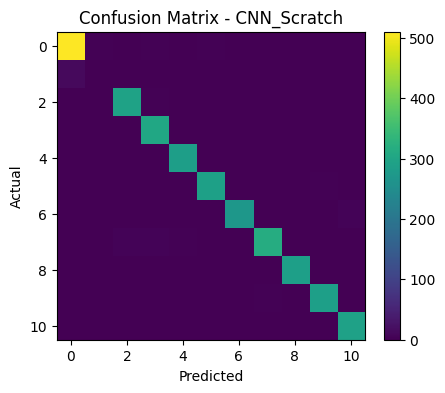

100/100 ━━━━━━━━━━━━━━━━━━━━ 312s 3s/step

===== VGG16 =====
                                  precision    recall  f1-score   support

                     animal fish       0.98      0.99      0.98       520
                animal fish bass       0.40      0.15      0.22        13
   fish sea_food black_sea_sprat       1.00      0.99      0.99       298
   fish sea_food gilt_head_bream       0.99      1.00      0.99       305
   fish sea_food hourse_mackerel       1.00      1.00      1.00       286
        fish sea_food red_mullet       1.00      1.00      1.00       291
     fish sea_food red_sea_bream       1.00      0.99      0.99       273
          fish sea_food sea_bass       0.99      1.00      1.00       327
            fish sea_food shrimp       0.99      1.00      0.99       289
fish sea_food striped_red_mullet       0.99      1.00      0.99       293
             fish sea_food trout       1.00      1.00      1.00       292

                        accuracy                 

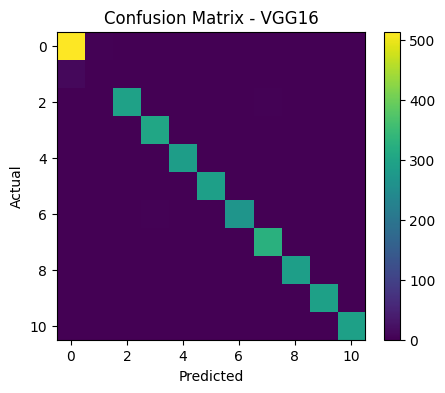

100/100 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step

===== ResNet50 =====
                                  precision    recall  f1-score   support

                     animal fish       0.98      0.80      0.88       520
                animal fish bass       0.09      0.08      0.08        13
   fish sea_food black_sea_sprat       0.53      0.95      0.68       298
   fish sea_food gilt_head_bream       0.85      0.65      0.74       305
   fish sea_food hourse_mackerel       0.81      0.64      0.72       286
        fish sea_food red_mullet       0.92      0.30      0.45       291
     fish sea_food red_sea_bream       0.91      0.82      0.86       273
          fish sea_food sea_bass       0.82      0.70      0.75       327
            fish sea_food shrimp       0.96      0.87      0.91       289
fish sea_food striped_red_mullet       0.53      0.78      0.63       293
             fish sea_food trout       0.65      0.97      0.78       292

                        accuracy              

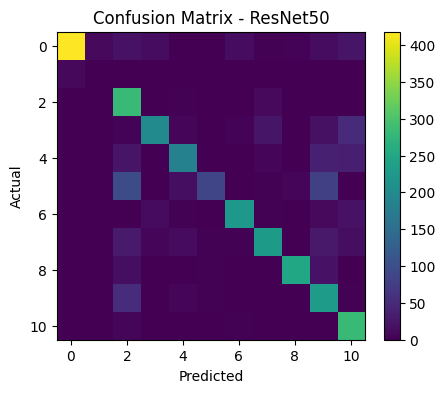

100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 434ms/step

===== MobileNetV2 =====
                                  precision    recall  f1-score   support

                     animal fish       0.99      1.00      1.00       520
                animal fish bass       1.00      0.77      0.87        13
   fish sea_food black_sea_sprat       1.00      0.99      0.99       298
   fish sea_food gilt_head_bream       1.00      0.99      0.99       305
   fish sea_food hourse_mackerel       1.00      0.99      0.99       286
        fish sea_food red_mullet       1.00      0.99      0.99       291
     fish sea_food red_sea_bream       0.98      1.00      0.99       273
          fish sea_food sea_bass       1.00      1.00      1.00       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       0.97      1.00      0.98       293
             fish sea_food trout       1.00      1.00      1.00       292

                        accuracy         

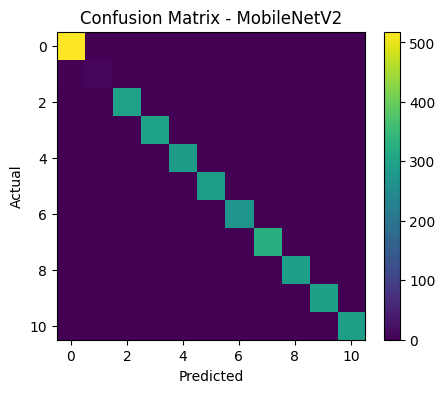

100/100 ━━━━━━━━━━━━━━━━━━━━ 81s 781ms/step

===== InceptionV3 =====
                                  precision    recall  f1-score   support

                     animal fish       1.00      1.00      1.00       520
                animal fish bass       1.00      0.85      0.92        13
   fish sea_food black_sea_sprat       1.00      1.00      1.00       298
   fish sea_food gilt_head_bream       0.99      1.00      1.00       305
   fish sea_food hourse_mackerel       0.98      1.00      0.99       286
        fish sea_food red_mullet       0.99      1.00      0.99       291
     fish sea_food red_sea_bream       1.00      0.99      1.00       273
          fish sea_food sea_bass       0.99      1.00      1.00       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       1.00      0.97      0.98       293
             fish sea_food trout       1.00      1.00      1.00       292

                        accuracy         

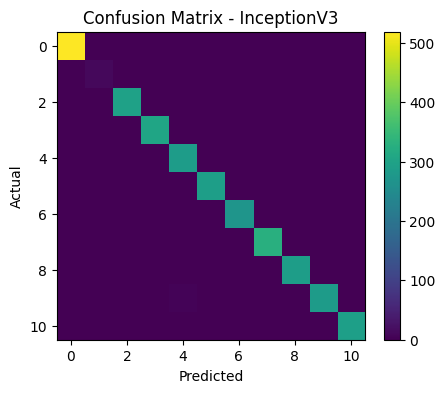

100/100 ━━━━━━━━━━━━━━━━━━━━ 53s 514ms/step

===== EfficientNetB0 =====
                                  precision    recall  f1-score   support

                     animal fish       0.64      0.85      0.73       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.00      0.00      0.00       298
   fish sea_food gilt_head_bream       0.18      0.07      0.10       305
   fish sea_food hourse_mackerel       0.00      0.00      0.00       286
        fish sea_food red_mullet       0.00      0.00      0.00       291
     fish sea_food red_sea_bream       0.11      1.00      0.21       273
          fish sea_food sea_bass       0.00      0.00      0.00       327
            fish sea_food shrimp       0.00      0.00      0.00       289
fish sea_food striped_red_mullet       0.00      0.00      0.00       293
             fish sea_food trout       0.00      0.00      0.00       292

                        accuracy      

c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

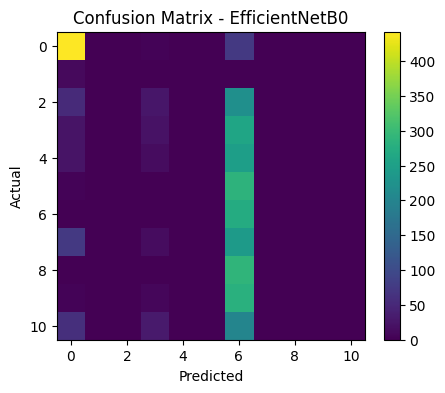

In [15]:
accuracies = {}

for name, model in models.items():
    acc = evaluate_model(model, name)
    accuracies[name] = acc

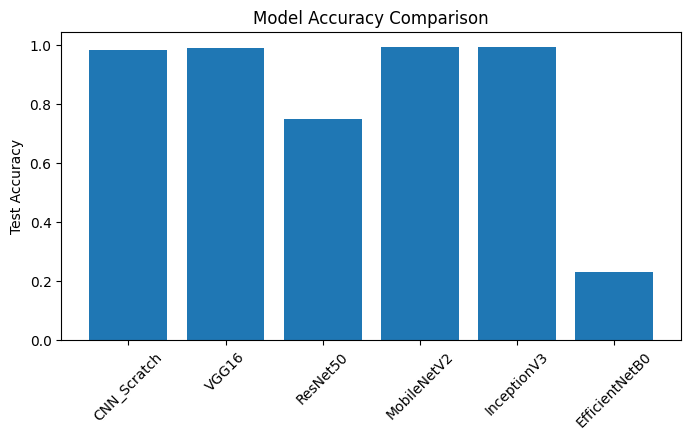

In [16]:
plt.figure(figsize=(8,4))
plt.bar(accuracies.keys(), accuracies.values())
plt.xticks(rotation=45)
plt.ylabel("Test Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()

In [23]:
accuracies

{'CNN_Scratch': np.float64(0.9836837150925636),
 'VGG16': np.float64(0.9918418575462817),
 'ResNet50': np.float64(0.7492940069030436),
 'MobileNetV2': np.float64(0.9943520552243489),
 'InceptionV3': np.float64(0.995293379353624),
 'EfficientNetB0': np.float64(0.23093818638217758)}

In [24]:
best_model_name = max(accuracies, key=accuracies.get)
best_model_name

'InceptionV3'

In [17]:
def plot_history(history, model_name):
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f"{model_name} Accuracy")
    plt.legend(['Train', 'Val'])

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f"{model_name} Loss")
    plt.legend(['Train', 'Val'])

    plt.show()

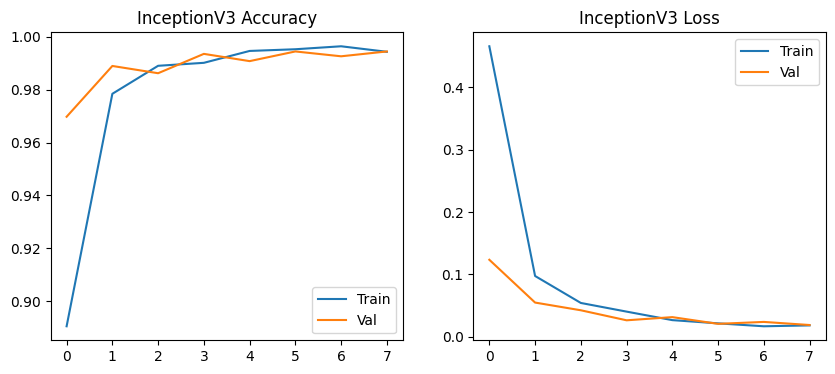

In [25]:
plot_history(history_inception, "InceptionV3")

In [26]:
train_data.class_indices


{'animal fish': 0,
 'animal fish bass': 1,
 'fish sea_food black_sea_sprat': 2,
 'fish sea_food gilt_head_bream': 3,
 'fish sea_food hourse_mackerel': 4,
 'fish sea_food red_mullet': 5,
 'fish sea_food red_sea_bream': 6,
 'fish sea_food sea_bass': 7,
 'fish sea_food shrimp': 8,
 'fish sea_food striped_red_mullet': 9,
 'fish sea_food trout': 10}